In [1]:
import graphviz

## A reminder on manpage conventions

- 1: User Commands
- 2: System Calls
- 3: C Library Functions
- 4: Devices and Special Files
- 5: File Formats and Conventions
- 6: Games et. al.
- 7: Miscellanea
- 8: System Administration tools and Daemons

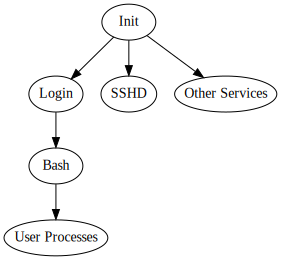

In [2]:
procTree = graphviz.Digraph()
procTree.node('init', 'Init')
procTree.node('login', 'Login')
procTree.node('ssh', 'SSHD')
procTree.node('services', 'Other Services')
procTree.node('bash', 'Bash')
procTree.node('userproc', 'User Processes')
procTree.edge('init', 'login')
procTree.edge('init', 'ssh')
procTree.edge('init', 'services')
procTree.edge('login', 'bash')
procTree.edge('bash', 'userproc')
procTree

## Child Procs
### Permissions
Proc can get permissions either directly from the os, or from the parent

### Address Space
Child can get an exact copy of the parent's address space (same code, stack, heap, etc) IE for daemon/worker processes, run a different branch. More unix-ish -- `fork(2)`

Or, child can get a completely seperate address space with a different program loaded. More NT-ish -- `CREATEPROCESS` / `exec(2)`

### Execution modes
Async: Both execute in parallel, both marked as `ready`

Blocking: Child proc get run as an event, parent is `waiting`, child is `ready` -- parent calls `wait(2)`

### Calls
- `fork(2)`: No params, makes a copy of parent. Parent gets PID of child, child gets 0 as a return val
- `exec(2)`: Specify the file to run. Parent gets the PID of child

## Interesting Brainfuck
What does the following code do?

How many processes will there be at the return?

```c
0 int main(){
1    fork();
2    fork();
3    fork();
4    return 0;
5 }
```

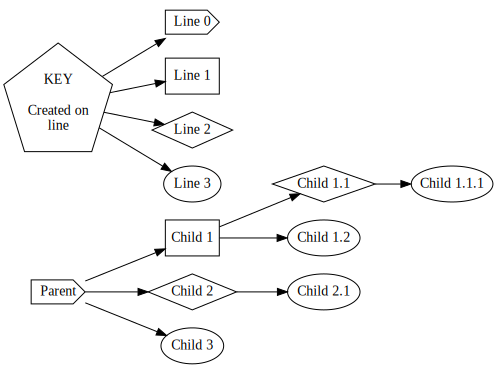

In [3]:
bfTree = graphviz.Digraph()
bfTree.attr(rankdir='LR')
bfTree.node('parent', label='Parent', shape='cds')
bfTree.node('child1', label='Child 1', shape='rect')
bfTree.node('child2', label='Child 2', shape='diamond')
bfTree.node('child1.1', label='Child 1.1', shape='diamond')
bfTree.node('child1.1.1', label='Child 1.1.1')
bfTree.node('child1.2', label='Child 1.2')
bfTree.node('child2.1', label='Child 2.1')
bfTree.node('child3', label='Child 3')
bfTree.edge('parent', 'child1')
bfTree.edge('child1', 'child1.1')
bfTree.edge('child1.1', 'child1.1.1')
bfTree.edge('child1', 'child1.2')
bfTree.edge('parent', 'child2')
bfTree.edge('child2', 'child2.1')
bfTree.edge('parent', 'child3')

bfTree.node('key', label='KEY\n\nCreated on\nline', shape='pentagon')
bfTree.node('Line 0', shape='cds')
bfTree.node('Line 1', shape='rect')
bfTree.node('Line 2', shape='diamond')
bfTree.node('Line 3')
bfTree.edge('key', 'Line 0')
bfTree.edge('key', 'Line 1')
bfTree.edge('key', 'Line 2')
bfTree.edge('key', 'Line 3')
bfTree

# IPC
Interprocess communication

Independent processes aren't affected by other procs, and other procs aren't affected by them. No sharing of data

Coop processes are (any of the above)

## Mechanisms
### Shared memory
One process creates a shared space, the other attaches to it
### Message passing
